# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [74]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [75]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('cms_hospital_readmissions.csv')

****
## Preliminary Analysis

In [76]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


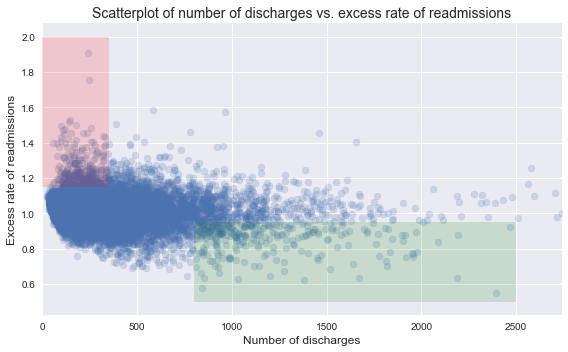

In [77]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

 # Question A
 - I feel that these two independent variables (readmission ratio and discarges) show little negative correlation.
 - I also feel that the qualification of the correlation is not well founded in the analysis of the means.
     - The two groups (<100 and >1000 discharges) feel like arbitrary groupings and no analysis is performed to see if these variations could arise by chance.

# Question B

In [88]:
df = clean_hospital_read_df[clean_hospital_read_df['Number of Discharges'] != 0]
df.columns

Index(['Hospital Name', 'Provider Number', 'State', 'Measure Name',
       'Number of Discharges', 'Footnote', 'Excess Readmission Ratio',
       'Predicted Readmission Rate', 'Expected Readmission Rate',
       'Number of Readmissions', 'Start Date', 'End Date'],
      dtype='object')

H˚: There is no correlation between discharge and readmission rates

H*a*: There is a correlation

- *I don't find the expected and predicted value calculations to be very transparent. I am therefore encouraged to use the raw observed discharge and readmission counts over the 3 years.*

In [89]:
def pearson_r(x, y):
    """Compute Pearson correlation coefficient between two arrays."""
    # Compute correlation matrix: corr_mat
    corr_mat = np.corrcoef(x, y)

    # Return entry [0,1]
    return corr_mat[0,1]

In [90]:
# Setup arrays for x, y data and remove extreme values
x_hosp = np.array(df['Number of Discharges'][:-3])
y_hosp = np.array(df['Excess Readmission Ratio'][:-3])
print(len(x_hosp), len(y_hosp))

11494 11494


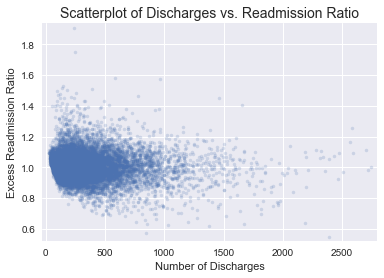

Pearson Correlation Coefficent: -0.09309554287590444


In [91]:
sns.set()

# Plot the discharge versus readmission ratio
_ = plt.plot(x_hosp, y_hosp, marker='.', linestyle='none', alpha=0.2)

# Set the margins and label axes
plt.margins(0.02)
_ = plt.xlabel('Number of Discharges')
_ = plt.ylabel('Excess Readmission Ratio')
_ = plt.title('Scatterplot of Discharges vs. Readmission Ratio', fontsize=14)

# Show the plot
plt.show()

# Show the Pearson correlation coefficient
print('Pearson Correlation Coefficent:', pearson_r(x_hosp, y_hosp))

slope = -2.856505294382361e-05 number of discharges / readmission ratio
intercept = 1.0179475579544206 readmission ratio


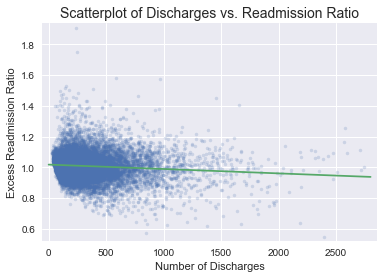

In [92]:
# Plot the discharge versus readmission ratio
_ = plt.plot(x_hosp, y_hosp, marker='.', linestyle='none', alpha=0.2)

plt.margins(0.02)
_ = plt.xlabel('Number of Discharges')
_ = plt.ylabel('Excess Readmission Ratio')
_ = plt.title('Scatterplot of Discharges vs. Readmission Ratio', fontsize=14)

# Perform a linear regression using np.polyfit(): a, b
a, b = np.polyfit(x, y, 1)

# Print the results to the screen
print('slope =', a, 'number of discharges / readmission ratio')
print('intercept =', b, 'readmission ratio')

# Make theoretical line to plot
x_reg = np.array([0, 2800])
y_reg = a * x + b

# Add regression line to your plot
_ = plt.plot(x_reg, y_reg)

# Draw the plot
plt.show()

In [93]:
def draw_bs_pairs_linreg(x, y, size=1):
    """Perform pairs bootstrap for linear regression."""

    # Set up array of indices to sample from: inds
    inds = np.arange(len(x))

    # Initialize replicates: bs_slope_reps, bs_intercept_reps
    bs_slope_reps = np.empty(size)
    bs_intercept_reps = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_inds = np.random.choice(inds, size=len(inds))
        bs_x, bs_y = x[bs_inds], y[bs_inds]
        bs_slope_reps[i], bs_intercept_reps[i] = np.polyfit(bs_x, bs_y, deg=1)

    return bs_slope_reps, bs_intercept_reps

[-3.55065200e-05 -2.17566665e-05]


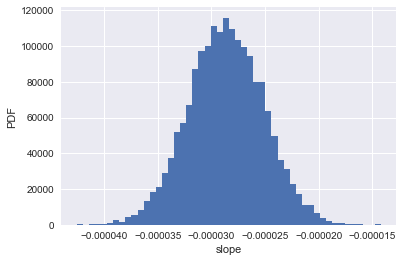

In [95]:
# Generate replicates of slope and intercept using pairs bootstrap
bs_slope_reps, bs_intercept_reps = draw_bs_pairs_linreg(x_hosp, y_hosp, 10000)

# Compute and print 95% CI for slope
print(np.percentile(bs_slope_reps, [2.5, 97.5]))

# Plot the histogram
_ = plt.hist(bs_slope_reps, bins=50, density=True)
_ = plt.xlabel('slope')
_ = plt.ylabel('PDF')
plt.show()

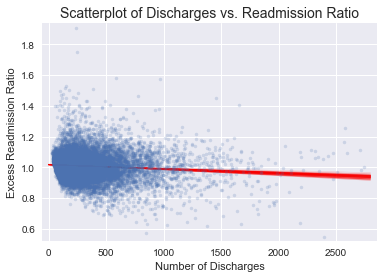

In [97]:
# Generate array of x-values for bootstrap lines: x
x_reg = np.array([0, 2800])

# Plot the bootstrap lines
for i in range(100):
    _ = plt.plot(x_reg, bs_slope_reps[i]*x + bs_intercept_reps[i],
                 linewidth=0.5, alpha=0.2, color='red')

# Plot the data
_ = plt.plot(x_hosp, y_hosp, marker='.', linestyle='none', alpha=0.2)

# Label axes, set the margins, and show the plot
_ = plt.xlabel('Number of Discharges')
_ = plt.ylabel('Excess Readmission Ratio')
_ = plt.title('Scatterplot of Discharges vs. Readmission Ratio', fontsize=14)
plt.margins(0.02)
plt.show()

In [108]:
np.random.seed(42)
# Compute observed correlation: r_obs
r_obs = pearson_r(x_hosp, y_hosp)

# Initialize permutation replicates: perm_replicates
perm_replicates = np.empty(100000)

# Draw replicates
for i in range(10000):
    # Permute discharge measurments:
    discharge_permuted = np.random.permutation(x_hosp)
    
    readmission_permuted = np.random.permutation(y_hosp)

    # Compute Pearson correlation
    perm_replicates[i] = pearson_r(discharge_permuted, readmission_permuted)

# Compute p-value: p
p = np.sum(perm_replicates >= r_obs) / len(perm_replicates)
print('p-val =', p)

p-val = 1.0


Therefore, not a single permutated pair of discharges and readmission ratio had a correlation as negative as the observed data.

I would suggest that the US government's Center for Medicare and Medicaid Services (CMS) consider a new metric to describe the cause of the readmission rates. Potentially the lifestyle choices and demographics, of the communities that the high readmission ratio hospitals cater to, are a variable to consider in this investigation.